In [ ]:
## Data Pre-processing for Label data encoding
## Decision Tree
### Label data encoding in multiple ways
#### 1. Label Encoder
#### 2. OneHot Encoding
#### 3. get_dummies
dataset = {'sname':['ramu','rama','sinu','sita','vasu','uma'],
           'gender':['Male','Female','Male','Female','Male','Female'],
           'maritalstatus':['Unmarried','Unmarried','Married','Unmarried','Married','Unmarried'],
           'is_bool':['True','False','True','True','False','False']}
dataset.keys()


dict_keys(['sname', 'gender', 'maritalstatus', 'is_bool'])

In [ ]:
import pandas as pd
df = pd.DataFrame(dataset)
df

,sname,gender,maritalstatus,is_bool
0,ramu,Male,Unmarried,True
1,rama,Female,Unmarried,False
2,sinu,Male,Married,True
3,sita,Female,Unmarried,True
4,vasu,Male,Married,False
5,uma,Female,Unmarried,False


In [ ]:
from sklearn.preprocessing import LabelEncoder
model = LabelEncoder()

model.fit(df['gender'])
df['gender'] = model.transform(df['gender'])
df

,sname,gender,maritalstatus,is_bool
0,ramu,1,Unmarried,True
1,rama,0,Unmarried,False
2,sinu,1,Married,True
3,sita,0,Unmarried,True
4,vasu,1,Married,False
5,uma,0,Unmarried,False


In [ ]:
from sklearn.preprocessing import OneHotEncoder
model = OneHotEncoder()
onhot = model.fit(df['maritalstatus'].values.reshape(-1,1))
onhot
df['maritalstatus']=model.transform(df['maritalstatus'])
df

AttributeError: ignored

In [ ]:
df

,sname,gender,maritalstatus,is_bool
0,ramu,1,Unmarried,True
1,rama,0,Unmarried,False
2,sinu,1,Married,True
3,sita,0,Unmarried,True
4,vasu,1,Married,False
5,uma,0,Unmarried,False


In [ ]:
##DecisionTree 
###Entropy = Measure of Randomnes or unpredictability
###Information gain = Decrease of entropy(e2-e1)
###Decision node, Leaf node
from sklearn.datasets import load_iris
iris_dataset = load_iris()
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
import pandas as pd
df = pd.DataFrame(iris_dataset['data'],columns=iris_dataset.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target'] = iris_dataset.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
X=df.drop(columns='target')
y=df['target']

1.0


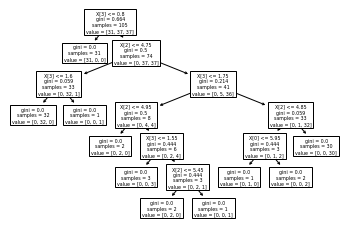

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=2, random_state=0)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))

import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(model)
plt.show()

In [ ]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

In [ ]:
import pandas as pd
df = pd.read_csv('/content/sample_data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.shape

(768, 9)

In [ ]:
df['Outcome'].unique()

array([1, 0])

In [ ]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
y_predict

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
#print(accuracy_score(X_train,y_train))
#print(accuracy_score(X_test,y_test))
print(accuracy_score(y_test,y_predict))

0.696969696969697


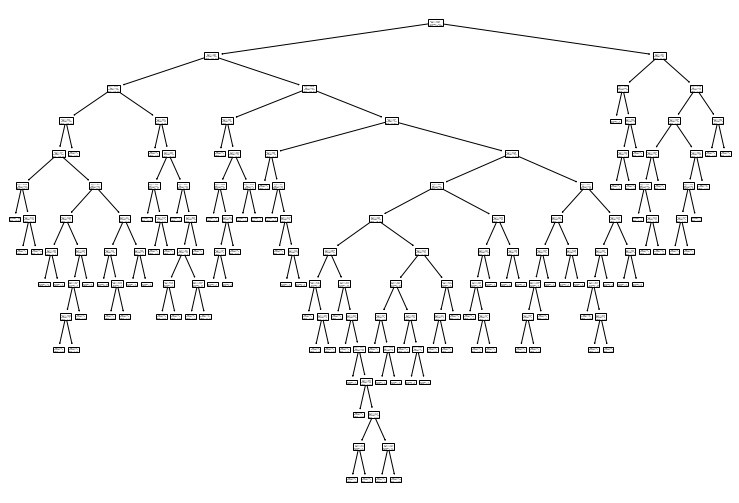

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(13,9))
tree.plot_tree(model)
plt.show()

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#LogisticRegression for Diabetic dataset

In [ ]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
model1.score(X,y)*100

76.5625

In [ ]:
from sklearn.metrics import confusion_matrix
y_predict = model1.predict(X)
confusion_matrix(y,y_predict)

array([[433,  67],
       [113, 155]])

In [ ]:
X = df[['Pregnancies','Glucose','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
model1.fit(X_train,y_train)
y_predict = model1.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))

0.7359307359307359


In [ ]:
#SVM for Diabetic dataset

In [ ]:
from sklearn.svm import SVC
model2 = SVC()
model2.fit(X,y)
print(model2.score(X,y))
print(model2.score(X_train,y_train))
print(model2.score(X_test,y_test))

0.7630208333333334
0.770949720670391
0.7445887445887446


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
model2.fit(X_train,y_train)
y_predict = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))

0.7359307359307359
